<a href="https://colab.research.google.com/github/eflores5000/estrategia2/blob/main/Trabajo_final_v0_RN_MovilNetv2_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

1. Carga del conjunto de datos

In [2]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [3]:
#%%capture
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()
#uploaded = files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eduflowers","key":"8cf8eb7e9d3d4d836fe29bda7df108d9"}'}

In [4]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Descarguemos un dataset de cierta competición
#!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("ifigotin/imagenetmini-1000")

path = kagglehub.dataset_download("ambityga/imagenet100")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imagenet100


In [6]:
from google.colab import drive
import shutil
import os

# 1. Montar Google Drive
#drive.mount('/content/drive')

# 2. Definir rutas
for i in range(1, 5):
  origen = f'/kaggle/input/imagenet100/train.X{i}'
  destino = '/content/kaggle/train'

  # 3. Copiar TODO el árbol de directorios (sobrescribiendo si existe)
  try:
      shutil.copytree(origen, destino, dirs_exist_ok=True)  # ¡Clave para evitar FileExistsError!
      print(f"¡Copia completada! Directorios copiado {origen} a {destino}")
  except Exception as e:
      print(f"Error inesperado: {str(e)}")


¡Copia completada! Directorios copiado /kaggle/input/imagenet100/train.X1 a /content/kaggle/train
¡Copia completada! Directorios copiado /kaggle/input/imagenet100/train.X2 a /content/kaggle/train
¡Copia completada! Directorios copiado /kaggle/input/imagenet100/train.X3 a /content/kaggle/train
¡Copia completada! Directorios copiado /kaggle/input/imagenet100/train.X4 a /content/kaggle/train


In [44]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

mkdir: cannot create directory ‘my_dataset’: File exists


In [6]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/kaggle/drive/', force_remount=True)

Mounted at /content/drive


2. Inspección del conjunto de datos

/content/kaggle/train/n01440764/n01440764_10043.JPEG


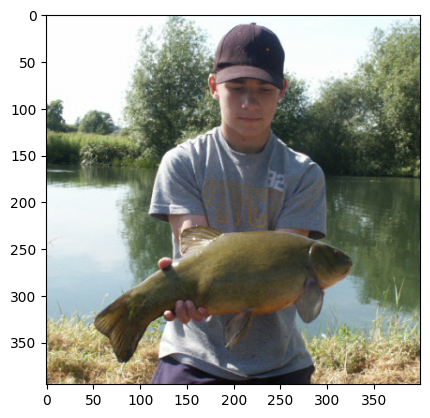

In [7]:
# Mostrar un elemento del dataset
#BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/imagenet100/train/n01440764/"
BASE_FOLDER = '/content/kaggle/train/n01440764/'
import matplotlib.pyplot as plt
import numpy as np
import cv2

#idx = np.random.randint(1, 1000)
#img = cv2.imread('test/' + str(idx) + '.jpg', cv2.COLOR_BGR2RGB)
nombre = BASE_FOLDER+'n01440764_' + '10043' + '.JPEG'
print(nombre)
img = cv2.imread(nombre, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

[INFO]: Clases disponibles: ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01531178', 'n01537544', 'n01560419', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01622779', 'n01630670', 'n01632458', 'n01632777', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01675722', 'n01677366', 'n01685808', 'n01687978', 'n01693334', 'n01695060', 'n01698640', 'n01728572', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01739381', 'n01740131', 'n01742172', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01770081', 'n01770393', 'n01773157', 'n01773549', 'n01773797', 'n01774384', 'n01774750', 'n01775062', 'n01776313', 'n01795545', 'n01796340', 'n01798484', 'n01806143', 'n01818515', 'n01819313', 'n01820546', 'n01824575', 'n01828970', 'n01829413', 'n01833805', 'n01843383', 'n01847000', 'n01855672', 'n01860187', 'n01877812', 'n01883070', 'n01910747', 'n01914609', 'n0192491

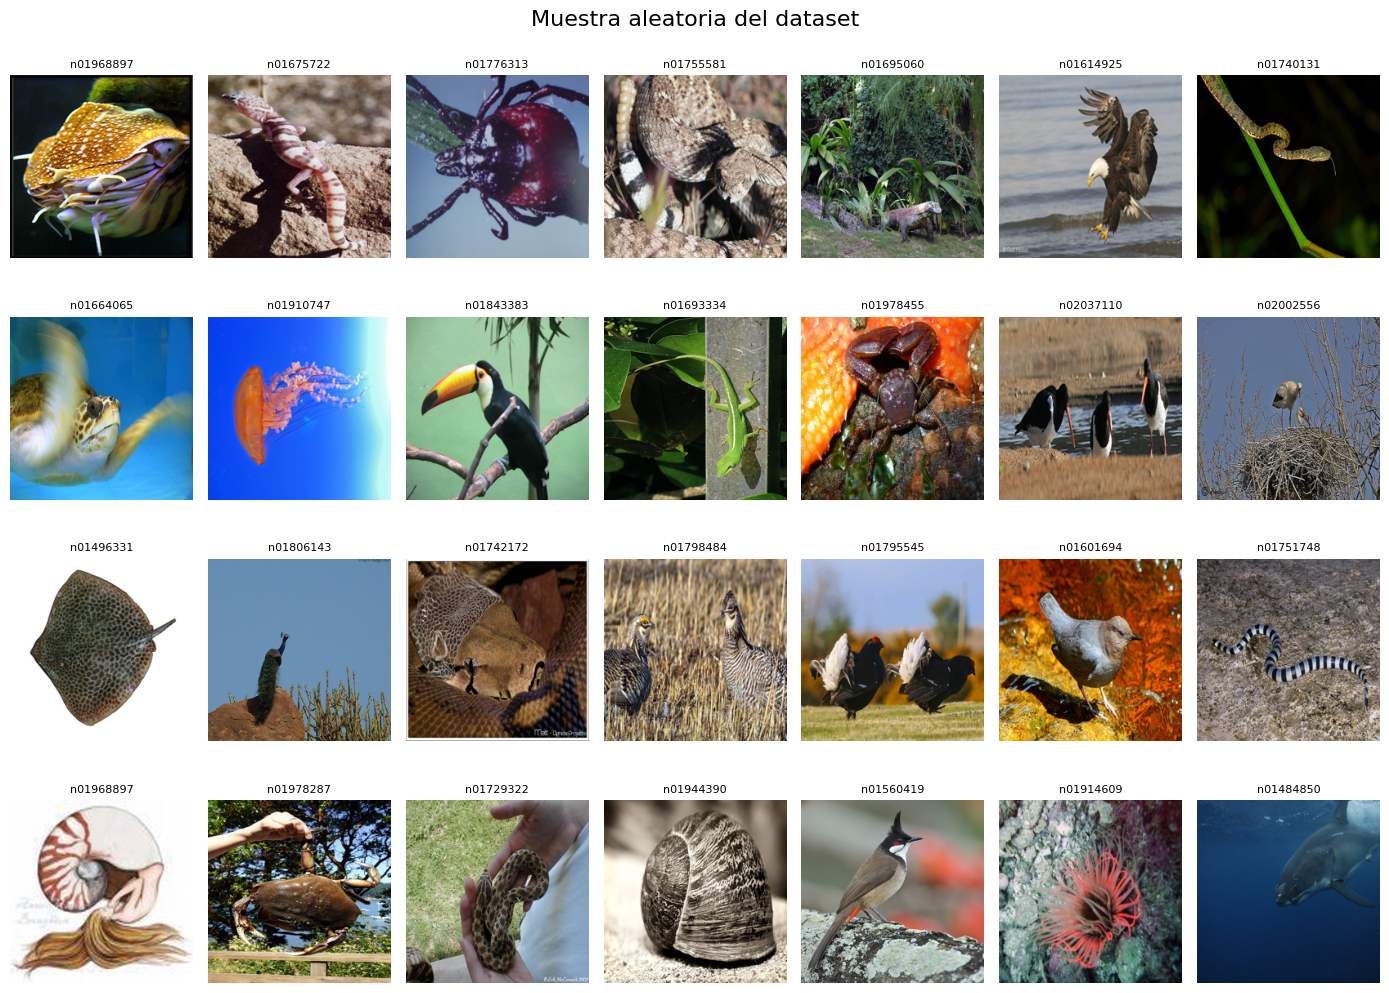

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Ruta al dataset de entrenamiento
#train_path = '/content/drive/MyDrive/Colab Notebooks/imagenet100/train'
train_path = '/content/kaggle/train'

# Obtener solo carpetas (clases) válidas
clases = sorted([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])
print(f"[INFO]: Clases disponibles: {clases}")

# Preparar lista de (imagen, etiqueta)
ejemplos = []
for clase in clases:
    ruta_clase = os.path.join(train_path, clase)
    imagenes = [f for f in os.listdir(ruta_clase) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for img in imagenes:
        ejemplos.append((os.path.join(ruta_clase, img), clase))

# Seleccionar aleatoriamente 28 imágenes
muestras = random.sample(ejemplos, 28)

# Visualización tipo CIFAR-10
fig = plt.figure(figsize=(14, 10))
for i, (ruta_img, etiqueta) in enumerate(muestras):
    fig.add_subplot(4, 7, i+1)
    img = Image.open(ruta_img).resize((224, 224))
    plt.imshow(img)
    plt.title(etiqueta, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Muestra aleatoria del dataset", fontsize=16, y=1.02)
plt.show()

3. Acondicionamiento del conjunto de datos

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.regularizers import l2
from sklearn.utils import class_weight
import numpy as np
import os
import matplotlib.pyplot as plt

## ---------------------------
## 1. Configuración inicial
## ---------------------------

# Parámetros ajustados para MobileNetV2
IMG_SIZE = (224, 224)
BATCH_SIZE = 128  # Batch más grande posible para mejor rendimiento
EPOCHS_TRANSFER = 10  # Más épocas para transfer learning
EPOCHS_FINE_TUNE = 10
INIT_LR = 1e-3  # Learning rate más alto para MobileNetV2
FINE_TUNE_LR = 1e-5

dataset_train = '/content/kaggle/train'
dataset_val = '/kaggle/input/imagenet100/val.X'


4. Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución

In [14]:
## ---------------------------
## 2. Preprocesamiento específico para MobileNetV2
## ---------------------------

# Preprocesamiento específico para MobileNetV2
def preprocess_input(x):
    return tf.keras.applications.mobilenet_v2.preprocess_input(x)

# Aumentación de datos optimizada para MobileNetV2
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# Generador de validación
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    dataset_train,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    dataset_val,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Verificación
num_classes = train_generator.num_classes
print(f"Número de clases detectadas: {num_classes}")
print(f"Mapping de clases: {train_generator.class_indices}")

# Balanceo de clases
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

## ---------------------------
## 3. Construcción del modelo MobileNetV2
## ---------------------------

# Cargar MobileNetV2 preentrenado
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(*IMG_SIZE, 3),
    alpha=1.0  # Width multiplier (1.0 = versión completa)
)

# Congelar inicialmente
base_model.trainable = False

# Arquitectura optimizada para MobileNetV2
inputs = tf.keras.Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)  # Menos neuronas que ResNet50
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)  # Capa más pequeña
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

## ---------------------------
## 4. Compilación optimizada para MobileNetV2
## ---------------------------

# Optimizador con parámetros ajustados
optimizer = optimizers.Adam(
    learning_rate=INIT_LR,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

# Callbacks mejorados
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,  # Reducción más agresiva
        patience=2,
        min_lr=1e-6
    ),
    ModelCheckpoint(
        'best_model_mobilenetv2.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    ),
    TensorBoard(
        log_dir='./logs_mobilenet',
        histogram_freq=1
    )
]

Found 130000 images belonging to 100 classes.
Found 5000 images belonging to 100 classes.
Número de clases detectadas: 100
Mapping de clases: {'n01440764': 0, 'n01443537': 1, 'n01484850': 2, 'n01491361': 3, 'n01494475': 4, 'n01496331': 5, 'n01498041': 6, 'n01514668': 7, 'n01514859': 8, 'n01531178': 9, 'n01537544': 10, 'n01560419': 11, 'n01582220': 12, 'n01592084': 13, 'n01601694': 14, 'n01608432': 15, 'n01614925': 16, 'n01622779': 17, 'n01630670': 18, 'n01632458': 19, 'n01632777': 20, 'n01644900': 21, 'n01664065': 22, 'n01665541': 23, 'n01667114': 24, 'n01667778': 25, 'n01675722': 26, 'n01677366': 27, 'n01685808': 28, 'n01687978': 29, 'n01693334': 30, 'n01695060': 31, 'n01698640': 32, 'n01728572': 33, 'n01729322': 34, 'n01729977': 35, 'n01734418': 36, 'n01735189': 37, 'n01739381': 38, 'n01740131': 39, 'n01742172': 40, 'n01749939': 41, 'n01751748': 42, 'n01753488': 43, 'n01755581': 44, 'n01756291': 45, 'n01770081': 46, 'n01770393': 47, 'n01773157': 48, 'n01773549': 49, 'n01773797': 50, 

5. Monitorización del proceso de entrenamiento para la toma de decisiones

In [15]:
## ---------------------------
## 5. Entrenamiento en Dos Fases
## ---------------------------

print("\n--- Fase 1: Transfer Learning ---")
history = model.fit(
    train_generator,
    epochs=EPOCHS_TRANSFER,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator))

base_model.save('best_model_mobilenetv2.h5')
print("✅ Modelo afinado guardado como 'best_model_mobilenetv2.h5'.")

base_model.save('final_model_MobileNetv2.h5')
print("✅ Modelo afinado guardado como 'final_model_MobileNetv2.h5'.")




--- Fase 1: Transfer Learning ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5025 - loss: 2.6317 - top_k_categorical_accuracy: 0.7443

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1940s 2s/step - accuracy: 0.5026 - loss: 2.6310 - top_k_categorical_accuracy: 0.7444 - val_accuracy: 0.7706 - val_loss: 1.2496 - val_top_k_categorical_accuracy: 0.9362 - learning_rate: 0.0010
Epoch 2/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7221 - loss: 1.3776 - top_k_categorical_accuracy: 0.9276

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1979s 2s/step - accuracy: 0.7221 - loss: 1.3775 - top_k_categorical_accuracy: 0.9276 - val_accuracy: 0.7778 - val_loss: 1.1325 - val_top_k_categorical_accuracy: 0.9410 - learning_rate: 0.0010
Epoch 3/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1922s 2s/step - accuracy: 0.7371 - loss: 1.2614 - top_k_categorical_accuracy: 0.9311 - val_accuracy: 0.7764 - val_loss: 1.1167 - val_top_k_categorical_accuracy: 0.9416 - learning_rate: 0.0010
Epoch 4/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7407 - loss: 1.2252 - top_k_categorical_accuracy: 0.9331

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1916s 2s/step - accuracy: 0.7407 - loss: 1.2252 - top_k_categorical_accuracy: 0.9331 - val_accuracy: 0.7818 - val_loss: 1.0846 - val_top_k_categorical_accuracy: 0.9450 - learning_rate: 0.0010
Epoch 5/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1926s 2s/step - accuracy: 0.7436 - loss: 1.2040 - top_k_categorical_accuracy: 0.9349 - val_accuracy: 0.7798 - val_loss: 1.0777 - val_top_k_categorical_accuracy: 0.9446 - learning_rate: 0.0010
Epoch 6/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1926s 2s/step - accuracy: 0.7441 - loss: 1.1886 - top_k_categorical_accuracy: 0.9360 - val_accuracy: 0.7802 - val_loss: 1.0847 - val_top_k_categorical_accuracy: 0.9406 - learning_rate: 0.0010
Epoch 7/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 1932s 2s/step - accuracy: 0.7448 - loss: 1.1893 - top_k_categorical_accuracy: 0.9346 - val_accuracy: 0.7756 - val_loss: 1.0707 - val_top_k_categorical_accuracy: 0.9462 - learning_rate: 0.0010


✅ Modelo afinado guardado como 'best_model_mobilenetv2.h5'.
✅ Modelo afinado guardado como 'final_model_MobileNetv2.h5'.


Aplicando Fine-Tuning

In [19]:
#1. GPU y precisión mixta
!nvidia-smi  # Verifica GPU activa

from tensorflow.python.client import device_lib
device_lib.list_local_devices()  # Asegúrate que ve la GPU

import tensorflow as tf
from tensorflow.keras import mixed_precision

# ⚡ Activar precisión mixta y compilador XLA
mixed_precision.set_global_policy('mixed_float16')  # hasta 3x en GPUs modernas
tf.config.optimizer.set_jit(True)  # Habilita compilador XLA

# 2. Descongelar correctamente el modelo
# Descongelar solo los últimos 54 bloques de MobileNetV2 (de 154 capas)
base_model.trainable = True
for layer in base_model.layers[:-54]:
    layer.trainable = False


Wed Apr 30 16:46:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             52W /  400W |    8679MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [20]:
#3. Recompilación con precisión mixta
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

optimizer = Adam(learning_rate=FINE_TUNE_LR)
loss = CategoricalCrossentropy(label_smoothing=0.1)  # ⚠️ opcional pero útil

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)


In [ ]:
#4. Entrenamiento fine-Tuning
history_fine = model.fit(
    train_generator,
    epochs=EPOCHS_TRANSFER + EPOCHS_FINE_TUNE,
    initial_epoch=history.epoch[-1] + 1,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

#5. Guardado del modelo
model.save('final_model_mobilenetv2_finetuning.h5')
model.save('mobilenetv2_finetuned', save_format='tf')
print("✅ Modelo final guardado como 'final_model_mobilenetv2_finetuning.h5'")




Epoch 8/20
 736/1016 ━━━━━━━━━━━━━━━━━━━━ 8:44 2s/step - accuracy: 0.7668 - loss: 2.2178

6. Evaluación del modelo predictivo

In [ ]:
## ---------------------------
## 6. Evaluación Final
## ---------------------------

# Cargar el mejor modelo guardado
best_model = tf.keras.models.load_model('best_model_mobilenetv2.h5')

# Evaluación cuantitativa
print("\nEvaluación en conjunto de validación:")
val_loss, val_acc, val_top5 = best_model.evaluate(val_generator)
print(f"Accuracy: {val_acc:.4f}")
print(f"Top-5 Accuracy: {val_top5:.4f}")

# Visualización de resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Precisión durante el entrenamiento')
plt.legend(['Entrenamiento', 'Validación'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Pérdida durante el entrenamiento')
plt.legend(['Entrenamiento', 'Validación'])

plt.tight_layout()
plt.savefig('training_history_mobilenet.png')
plt.show()

In [50]:
# Copiando archivos finales
from google.colab import drive
import shutil
import os

# copiando archivos finales

origen = '/content/final_model_MobileNetv2.h5'
destino = '/content/drive/MyDrive/Colab Notebooks'
try:
  shutil.copy(origen, destino)
  print(f"¡Copia completada! {origen} a: {destino}")
except Exception as e:
    print(f"Error inesperado: {str(e)}")

origen = '/content/final_resnet50_finetuned.h5'
destino = '/content/drive/MyDrive/Colab Notebooks'
try:
  shutil.copy(origen, destino)
  print(f"¡Copia completada! {origen} a: {destino}")
except Exception as e:
  print(f"Error inesperado: {str(e)}")


¡Copia completada! /content/final_resnet50_model.h5 a: /content/drive/MyDrive/Colab Notebooks
¡Copia completada! /content/final_resnet50_finetuned.h5 a: /content/drive/MyDrive/Colab Notebooks
